In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#time series
import datetime
import time
from statsmodels.tsa.seasonal import seasonal_decompose
import requests


In [2]:
merged_df = pd.read_csv("DataSets/Merged_Data.csv")
df_2 = pd.read_csv("DataSets/listings_details.csv")

D:\PythonGuide\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Data Analysis

What is the plan for our exploratory data analysis

<b>1) Figure out what kind of variables have the most variance with regards to daily price<b>

We decided to plot histograms of the variables we thought would be most impactful in order to predict the price of the rbnb
these were:
* neighbourhood - Is it in north/east/south/west neighberhood
* bedrooms      - total amount of bedrooms in room
* accomadates   - max amount of people staying in room
* property type - type of room (house/appartment)
* amenities     - tv/internet
* host since    - since when did the host join rbnb (time series)


<b>2) Explore these variables more deeply (Time Series)<b>



<b>3) Soft Conclusion<b>






D:\PythonGuide\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


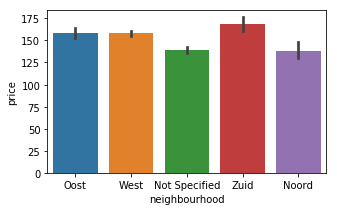

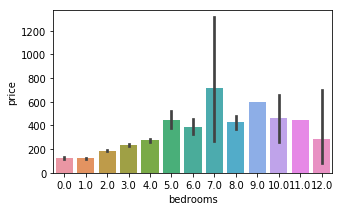

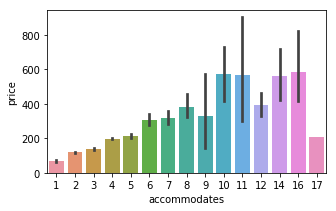

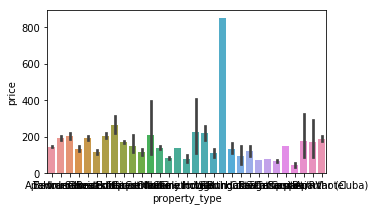

In [ ]:
#we know this is not most optimal but we got stuck figuring out how to plot it elsewise 
fig = plt.figure()
fig.set_size_inches(5,3)

#shows the average price of people in each neighbourhood
sns.barplot(x=merged_df["neighbourhood"],y= merged_df["price"])
plt.show()


#shows the average price of people in each bedrooms
fig = plt.figure()
fig.set_size_inches(5,3)
sns.barplot(x=merged_df["bedrooms"],y= merged_df["price"])
plt.show()

#shows the average price of people in each accommodates
fig = plt.figure()
fig.set_size_inches(5,3)
sns.barplot(x=merged_df["accommodates"],y= merged_df["price"])
plt.show()

#shows the average price of people in each property type
fig = plt.figure()
fig.set_size_inches(5,3) #change to bigger numbers to see x_labels
sns.barplot(x=merged_df["property_type"],y= merged_df["price"])
plt.show()

#this one contains one outlier var!
fig = plt.figure()
fig.set_size_inches(5,3) #change to bigger numbers to see x_labels
sns.barplot(x=merged_df["amenities"],y= merged_df["price"])
plt.show()


plt.tight_layout()

## Time Series Analysis 

Using a time Series for your Data will give more insights about your data. It will tell you if most cases come from a specific moment, 
or that the data is evenly spread out across time.
<br>
<br>
Since we're dealing with rbnb prices, we are mostly concerned with checking if our assumption of seasonality is correct: (finding reocurrring patterns in a year)
<br> 
<br>
It is for example important to know that our data sets average housing price of €100/night,
might actually be a lot higher in summer periods compared to other seasons.
<br>
<br>
Our hypothesis is to expect to see more listings in summer, but we'll check if this statement is correct 
<br>
<br>
Via this Time Series Analysis we'll check 2 things:
* 1) are there more people joining rbnb and putting their listings on the website in summer months?

* 2) how many linstings 1 host makes at a given point in time

<br>
The second point is important because it will probably tell us how many time a host can spend on 1 listing, 
which could in turn result in the quality of the listing -> result in price/review difference.<br>

<br>


## Change to old dataset
<br>
In our previous notebook we made a fucntion to split the host_since into a categorical variable (novice, intermediate, experienced)
Because we'll be needing the dates for the time Series analysis we'll be using the og data set.
<br>
<br>


In [4]:
#we changed the value host since in our previous notebook (to novice/intermediate/experienced) but decided we wanted to use a time series, thats why we used old df
df_2['host_since'] = pd.to_datetime(df_2['host_since'])
df_2['first_review'] = pd.to_datetime(df_2['first_review'])

#checks the range of dates we're dealing with
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(df_2.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(df_2.host_since).strftime('%d %B %Y')}.")

Of the Airbnb hosts that are still listing on the site, the first joined on 24 September 2008, and the most recent joined on 06 December 2018.


In [5]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df_2.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df_2.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)


In [6]:
def decompose_time_series(df_2, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df_2)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df_2, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

## Result 1 - Is there Seasonality?
As expected we see that their is seasonality.
* there is a peak in the summer months of the year (see graph below)


D:\PythonGuide\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
D:\PythonGuide\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


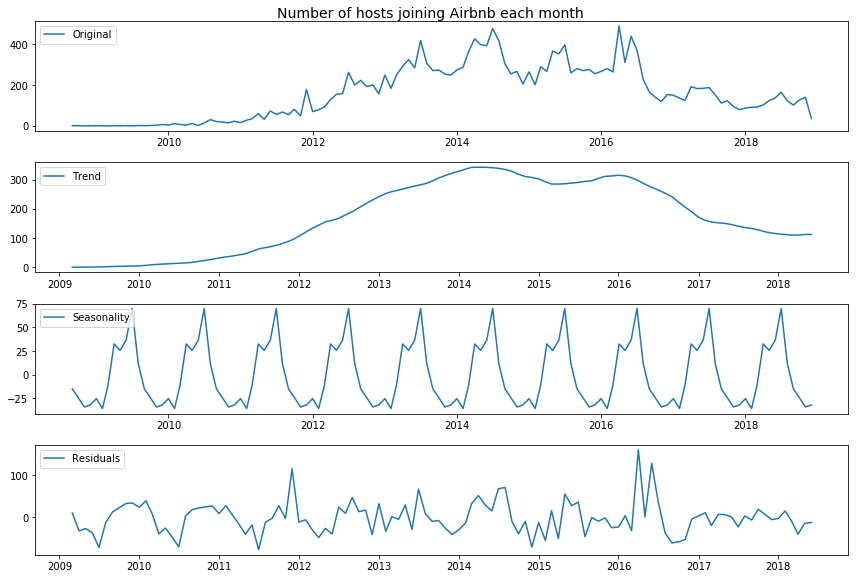

In [8]:
#we're clearly seeing seasonality implicating that more lists are hapening in the summer months of the year
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

## Result 2 - How many listings/host?
As our data set currently has missing data, year 2008,2012,2013,2014,2015,2017 contain a lot of missing data.<br>
yet we can still see that the amount of listings/host is mostly the same across years (~3)



D:\PythonGuide\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


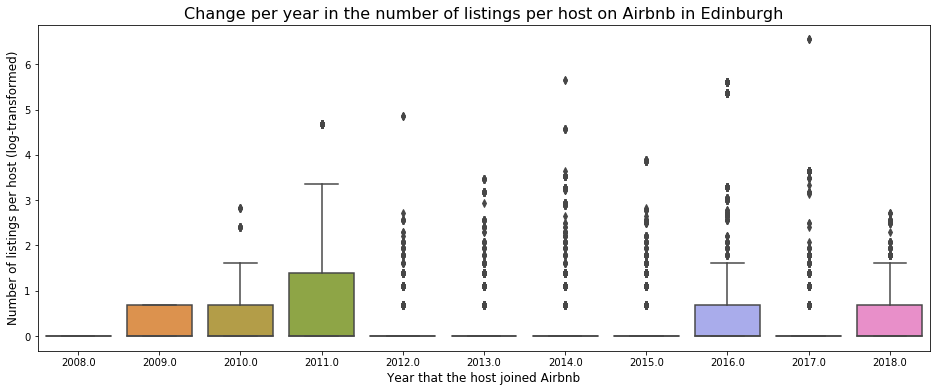

In [9]:
#since we have some missing values in 2012/2013/2014, they'll show 'empty' boxes
plt.figure(figsize=(16,6))
sns.boxplot(df_2.host_since.dt.year, np.log(df_2.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Edinburgh', fontsize=16)
plt.show()

In [26]:
#what type of hosts?

a = df_2.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]
a.sort_values("host_since")
#shows hosts with most listings ascending/year -> we're seeing an increasing trent in amnt listing/host -> So there are outliers!

#List of the largest host_listings_count (left is id number) and the year the host joined Airbnb

,host_since,host_listings_count
18314,2011-04-18,108.0
6779,2011-12-02,109.0
17880,2012-07-07,130.0
13854,2014-08-12,287.0
16028,2014-08-28,96.0
7060,2015-10-16,49.0
16841,2016-04-05,213.0
17038,2016-06-06,271.0
16053,2017-03-22,698.0
14903,NaT,NaN


## K-means cluster

K-means clustering is an unsupervised learning algorithm that will attempt to group similar clusters together in mostly unlabeled data <br> Since all our data is labeled, we'll use k-means cluster to check if certain types of labeled data could instead be regrouped into a construct

The algorithm works as follows:
<br><br>
<b> Do: </b> 
<br>
1) pick a number of clusters "K" <br>
2) Randomly assign each point to a cluster
<br><br>
<b> Repeat:</b>
<br>
3) Compute centrod by taking the mean vector of points in the cluster <br>
4) Assign each data point to the cluster for which the centroid is closest
<br><br>
<b> Stop:</b>
<br>
when clusters dont change


##################################################################################################################################################################<br>
All our variables have clear labels, and we don't think we really need to use k-means (most of the times people use k-means, when they have an attribute name but no labels in it)
We will however test if our labels are correct by performing a k-means on the attribute "Neighbourhood"<br>
##################################################################################################################################################################

In [95]:
%matplotlib inline
from sklearn.datasets import make_blobs

In [98]:
data = make_blobs(n_samples=200, n_features=2,centers=4,cluster_std=1.8,random_state =101)

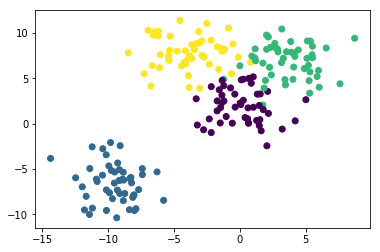

In [103]:
plt.scatter(data[0][:,0],data[0][:,1],c = data[1])

In [104]:
from sklearn.cluster import KMeans

In [109]:
kmeans = KMeans(n_clusters =4)
kmeans.fit(data[0])
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851]])

In [110]:
kmeans.labels_

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 0, 1, 3, 3, 3,
       0, 2, 3, 0, 1, 0, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 2, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

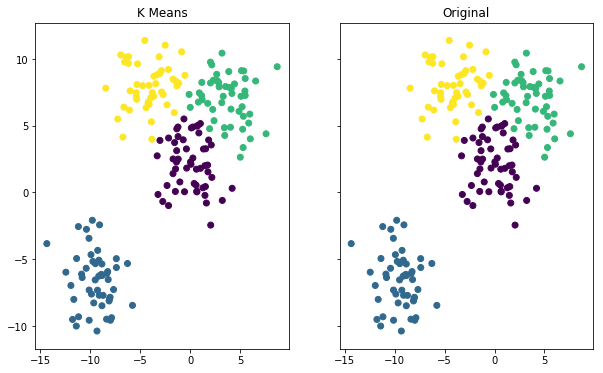

In [118]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize = (10,6))
ax1.set_title("K Means")
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_)

ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_)

In [119]:
merged_df.dropna()

,id,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count_y,reviews_per_month_y
11,43980,65041,Zuid,Entire home/apt,100,28,61,Recent (2018),0.62,2,...,80.0,8.0,7.0,9.0,9.0,9.0,8.0,strict_14_with_grace_period,2,0.62
23,52490,185836,Oost,Private room,72,3,81,Recent (2018),0.82,1,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict_14_with_grace_period,1,0.82
27,55256,260785,Oost,Private room,86,1,120,Recent (2018),1.26,1,...,92.0,9.0,9.0,10.0,10.0,10.0,9.0,flexible,1,1.26
28,55703,263214,Not Specified,Entire home/apt,250,3,3,Olf (2000-2017),0.07,1,...,100.0,10.0,10.0,10.0,9.0,10.0,9.0,flexible,1,0.07
36,62015,301340,Oost,Entire home/apt,109,2,21,Recent (2018),0.22,1,...,99.0,10.0,10.0,10.0,10.0,9.0,9.0,strict_14_with_grace_period,1,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,1922229,9961834,Oost,Entire home/apt,100,1,45,Recent (2018),0.76,1,...,94.0,10.0,9.0,10.0,10.0,10.0,9.0,moderate,1,0.76
1350,1927634,9314105,Oost,Entire home/apt,299,3,25,Recent (2018),0.47,1,...,97.0,10.0,10.0,10.0,10.0,9.0,9.0,strict_14_with_grace_period,1,0.47
1391,1986895,1329775,Not Specified,Entire home/apt,220,2,14,Recent (2018),0.23,1,...,94.0,10.0,9.0,10.0,10.0,10.0,9.0,strict_14_with_grace_period,1,0.23
1486,2137635,72249,West,Entire home/apt,249,3,16,Recent (2018),0.27,2,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2,0.27
